## 0) Importando Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

## 1) Lendo o arquivo

#### Fonte Kaggle:https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [7]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)','Direção do Vento(°)']
del turbina['Direção do Vento(°)']
turbina['Data/hora']= pd.to_datetime(turbina['Data/hora'])
display(turbina)

ValueError: time data "13 01 2018 00:00" doesn't match format "%m %d %Y %H:%M", at position 1706. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

## 2) Plotando os dados em um gráfico - Real

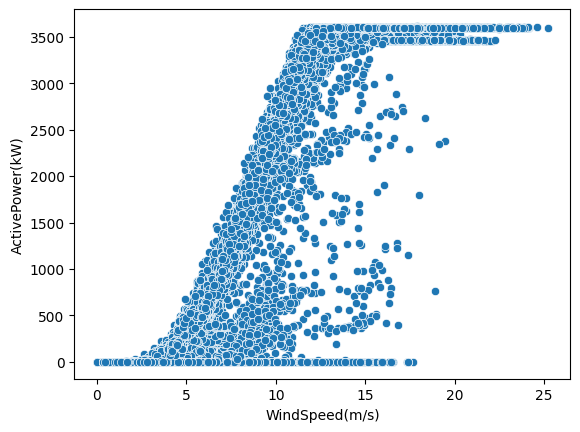

In [6]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)')

## 3) Plotando os dados em um gráfico - Teórica

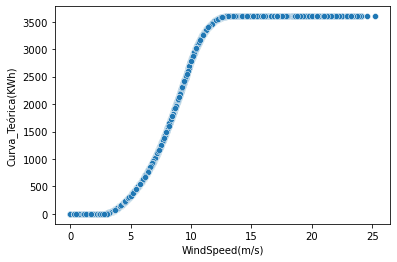

In [29]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)')

## 4) Criando "limites aceitáveis"

In [72]:
#vel_vento = turbina['WindSpeed(m/s)'].tolist()
pot_real= turbina['ActivePower(kW)'].tolist()
pot_teorica = turbina['Curva_Teórica(KWh)'].tolist()
pot_max=[]
pot_min=[]
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
    

#print(len(pot_max),len(pot_min))

print(dentro_limite.count('Dentro')/len(dentro_limite))



0.37286760340391845


## 5) Adicionando lista "dentro_limite" ao dataframe:

In [1]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

NameError: name 'dentro_limite' is not defined

## 6) Plotando novamente o gráfico:

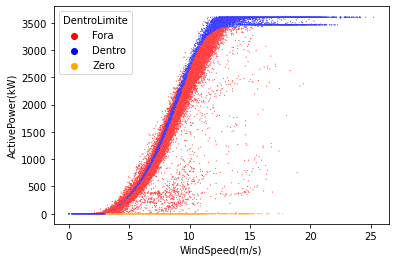

In [76]:
cores={'Dentro':'blue','Fora':'red','Zero':'orange'}
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)',hue='DentroLimite', s=1,palette=cores)